In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.diagnostic import linear_rainbow
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [17]:
df = pd.read_csv("tips (data for regression problem).csv")

In [18]:
print("Dataset Overview:")
print(df.info())
print("\nFirst 5 rows of the dataset:")
print(df.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None

First 5 rows of the dataset:
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [19]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [20]:
unique_values_per_column = df.apply(lambda x: x.unique())
print(unique_values_per_column)

total_bill    [16.99, 10.34, 21.01, 23.68, 24.59, 25.29, 8.7...
tip           [1.01, 1.66, 3.5, 3.31, 3.61, 4.71, 2.0, 3.12,...
sex                                              [Female, Male]
smoker                                                [No, Yes]
day                                       [Sun, Sat, Thur, Fri]
time                                            [Dinner, Lunch]
size                                         [2, 3, 4, 1, 6, 5]
dtype: object


In [21]:
df.dropna(inplace=True)

df = pd.get_dummies(df, columns=['day', 'time', 'sex', 'smoker', 'size'], drop_first=False)

X = df.drop(columns='tip')  
y = df['tip']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [22]:
df.head()

,total_bill,tip,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch,sex_Female,sex_Male,smoker_No,smoker_Yes,size_1,size_2,size_3,size_4,size_5,size_6
0,16.99,1.01,False,False,True,False,True,False,True,False,True,False,False,True,False,False,False,False
1,10.34,1.66,False,False,True,False,True,False,False,True,True,False,False,False,True,False,False,False
2,21.01,3.50,False,False,True,False,True,False,False,True,True,False,False,False,True,False,False,False
3,23.68,3.31,False,False,True,False,True,False,False,True,True,False,False,True,False,False,False,False
4,24.59,3.61,False,False,True,False,True,False,True,False,True,False,False,False,False,True,False,False


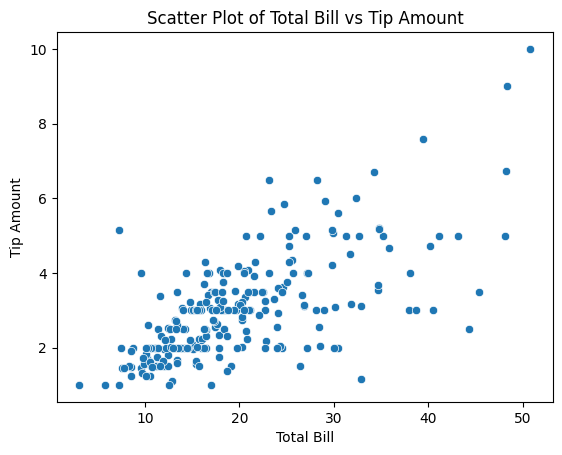

In [23]:
sns.scatterplot(x=df['total_bill'], y=df['tip'])
plt.title('Scatter Plot of Total Bill vs Tip Amount')
plt.xlabel('Total Bill')
plt.ylabel('Tip Amount')
plt.show()

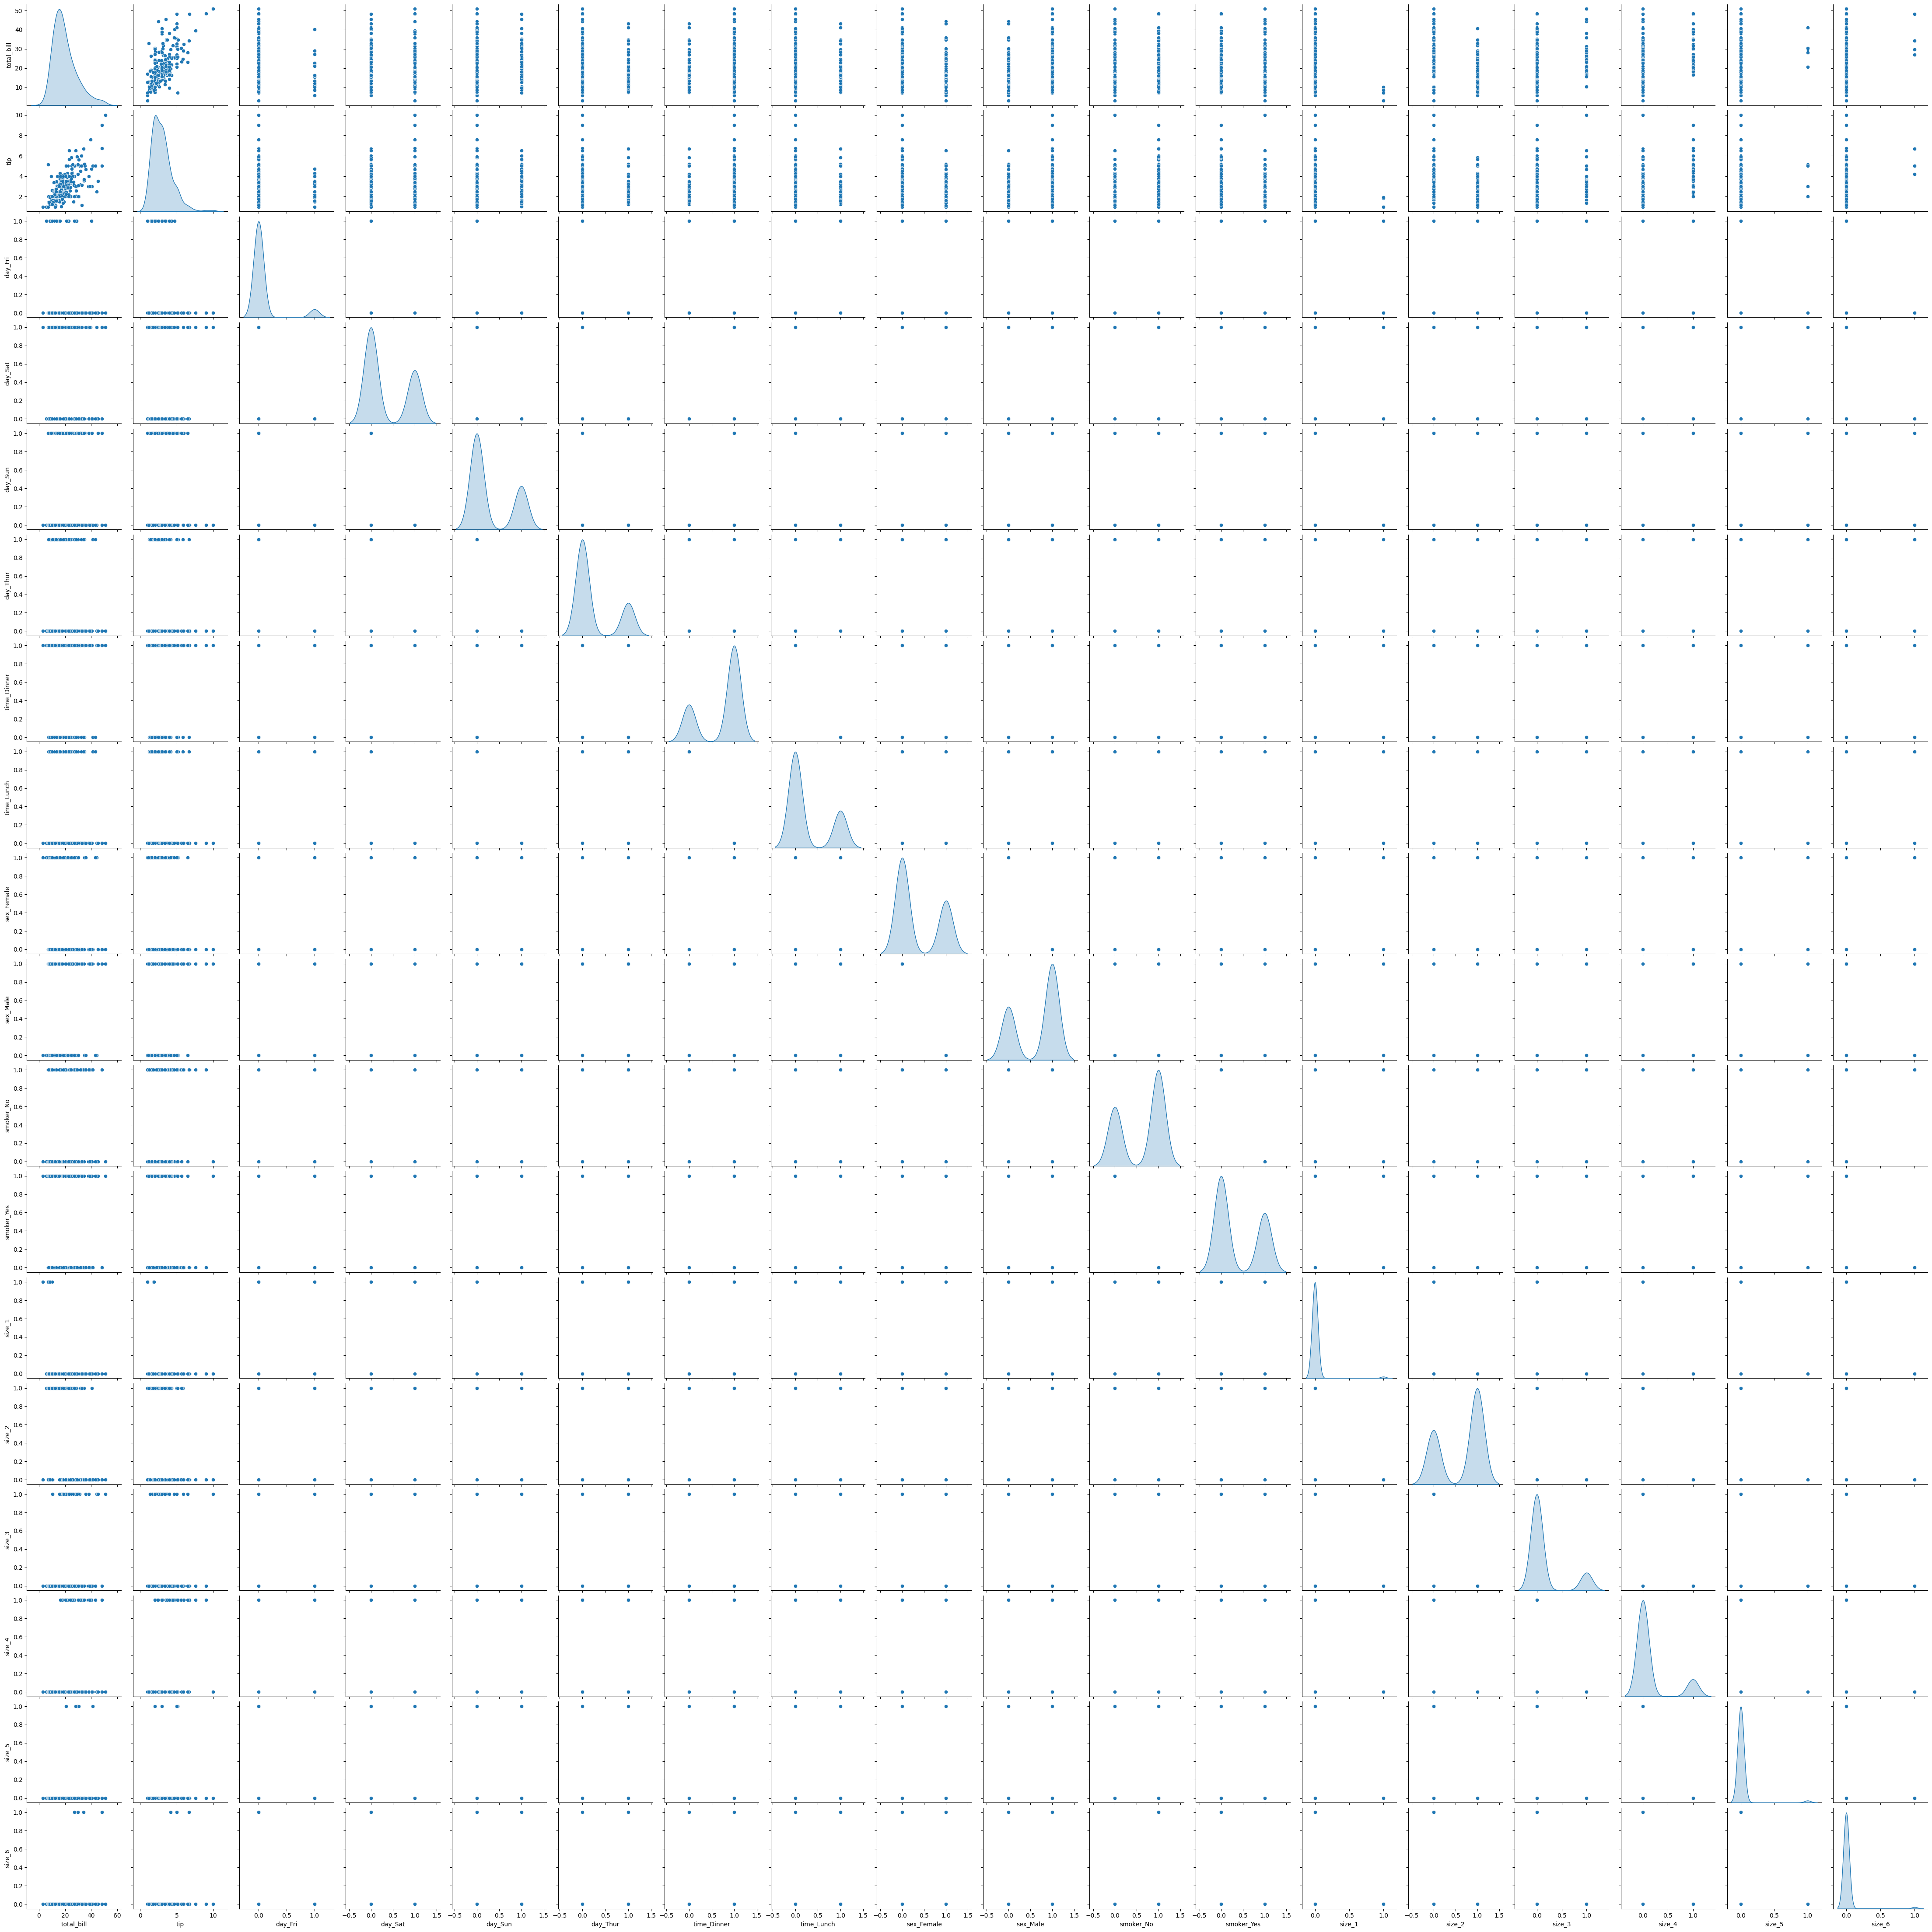

In [24]:
sns.pairplot(df, diag_kind='kde')
plt.show()

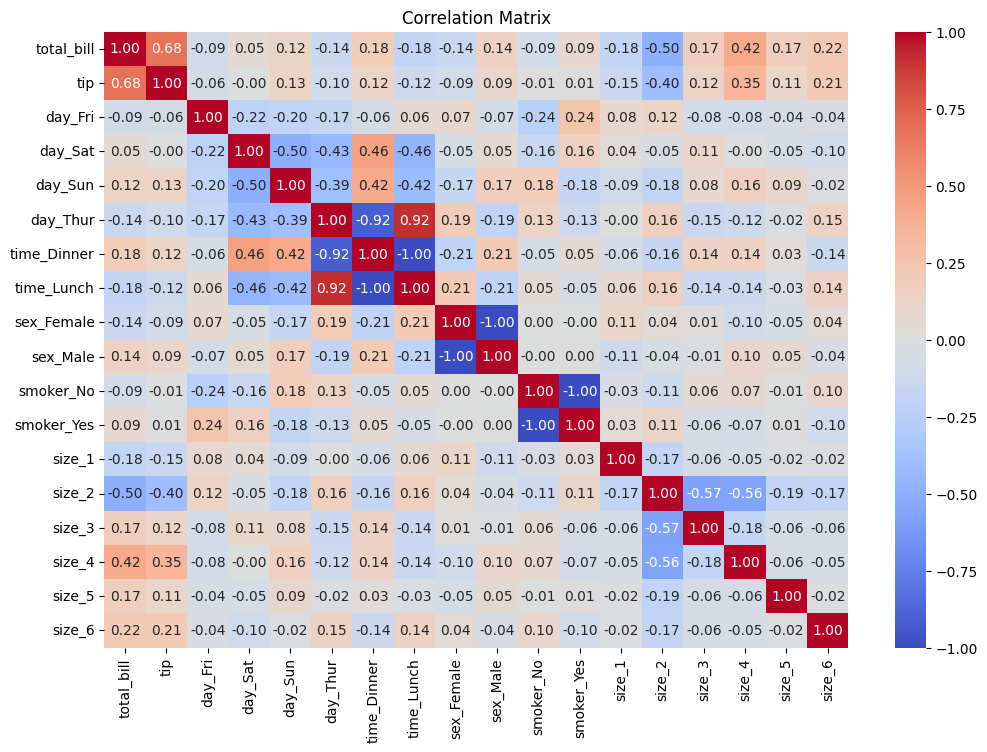

In [25]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

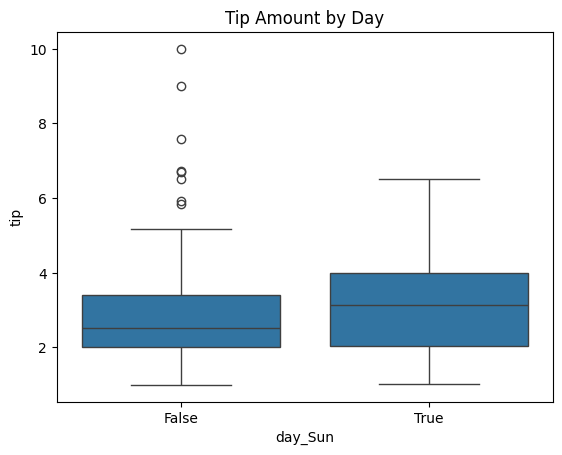

In [26]:
sns.boxplot(x='day_Sun', y='tip', data=df)
plt.title('Tip Amount by Day')
plt.show()

Rainbow Test Stat: 1.4725536835670676, P-value: 0.03473467792409115


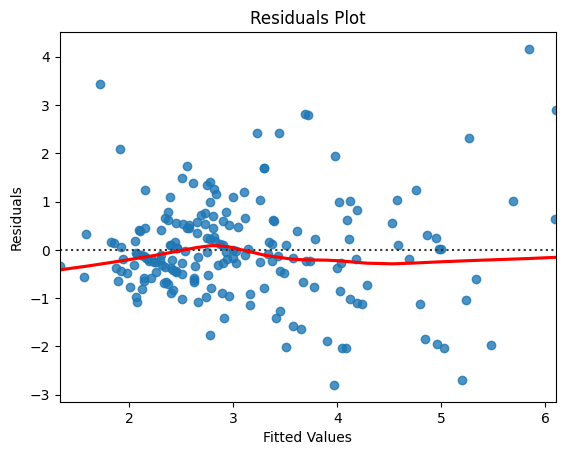

In [27]:
X_const = sm.add_constant(X_train) 
model = sm.OLS(y_train, X_const).fit()
rainbow_stat, rainbow_p_val = linear_rainbow(model)
print(f"Rainbow Test Stat: {rainbow_stat}, P-value: {rainbow_p_val}")

y_pred = model.predict(X_const)
residuals = y_train - y_pred
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

In [ ]:
results_list = []

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100),
    'Support Vector Regression': SVR(kernel='rbf'),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results_list.append({'Model': name, 'MAE': mae, 'MSE': mse, 'R2': r2})

results = pd.DataFrame(results_list)

print(results)

                       Model       MAE       MSE        R2
0          Linear Regression  0.681215  0.720563  0.423536
1           Ridge Regression  0.673974  0.726235  0.418999
2           Lasso Regression  0.656720  0.608614  0.513098
3              Decision Tree  0.922041  1.466090 -0.172899
4              Random Forest  0.766602  0.937468  0.250009
5  Support Vector Regression  0.742576  0.857097  0.314307
6        K-Nearest Neighbors  0.816367  1.003319  0.197326


In [31]:
best_model = results.loc[results['R2'].idxmax()]['Model']
print(f"\nThe best model based on R² Score is: {best_model}")


The best model based on R² Score is: Lasso Regression


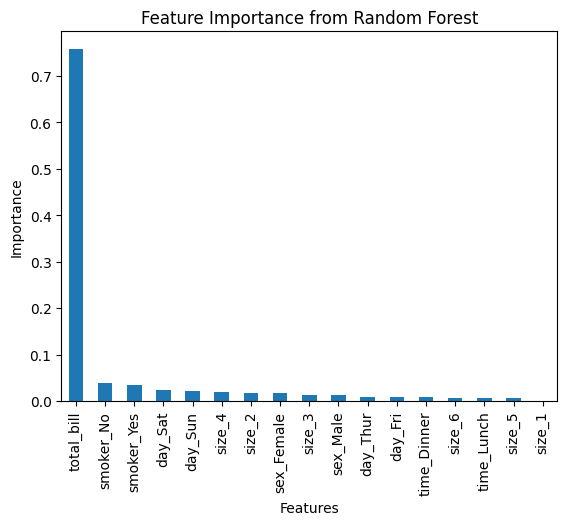

In [29]:
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
feature_importances = pd.Series(rf_model.feature_importances_, index=df.drop(columns='tip').columns)
feature_importances.sort_values(ascending=False, inplace=True)

feature_importances.plot(kind='bar')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()